In [1]:
from dtwclustering.dtw_analysis import dtw_signal_pairs, dtw_clustering
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from dtaidistance import dtw
%matplotlib inline 

# default matplotlib parameters
import matplotlib
font = {'family': 'Times',
        'weight': 'bold',
        'size': 22}

matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (12, 6)
plt.style.use('ggplot')

### Create 5 signals

In [2]:
# sampling parameters
fs = 100   # sampling rate, in Hz
T  = 1      # duration, in seconds
N  = T * fs # duration, in samples
M  = 5      # number of sources
R  = 3      # number of copies
MR = M * R 


# time variable
t = np.linspace(0, T, N)

S1 = np.sin(2 * np.pi * t * 7)
S2 = signal.sawtooth(2 * np.pi * t * 5)
S3 = np.abs(np.cos(2 * np.pi * t * 3)) - 0.5
S4 = np.sign(np.sin(2 * np.pi * t * 8))
S5 = np.random.randn(N)

time_series = np.array([S1, S2, S3, S4, S5])

In [3]:
## instantiate the class
dtw_cluster1 = dtw_clustering(time_series)

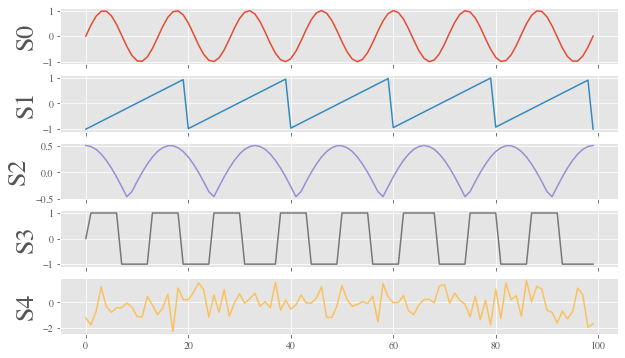

In [4]:
dtw_cluster1.plot_signals()
plt.show()

### Add noise and make 3 copies of each signal

In [5]:
SNR = 0.2
np.random.seed(0)
X0 = np.tile(S1, (R, 1)) + np.random.randn(R, N) * SNR 
X1 = np.tile(S2, (R, 1)) + np.random.randn(R, N) * SNR 
X2 = np.tile(S3, (R, 1)) + np.random.randn(R, N) * SNR 
X3 = np.tile(S4, (R, 1)) + np.random.randn(R, N) * SNR 
X4 = np.tile(S5, (R, 1)) + np.random.randn(R, N) * SNR 
X = np.concatenate((X0, X1, X2, X3, X4))

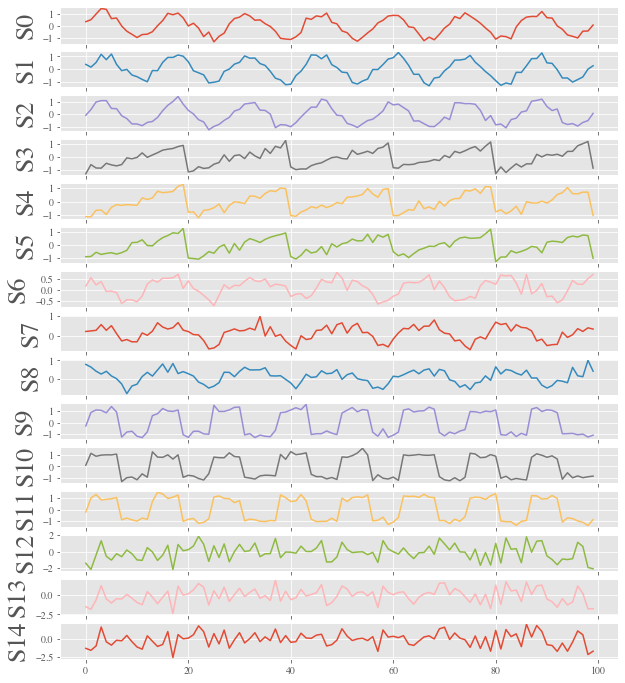

In [6]:
## instantiate the class
dtw_cluster2 = dtw_clustering(X)
dtw_cluster2.plot_signals(figsize=(10,12))
plt.show()

### Reshuffle the noisy signals

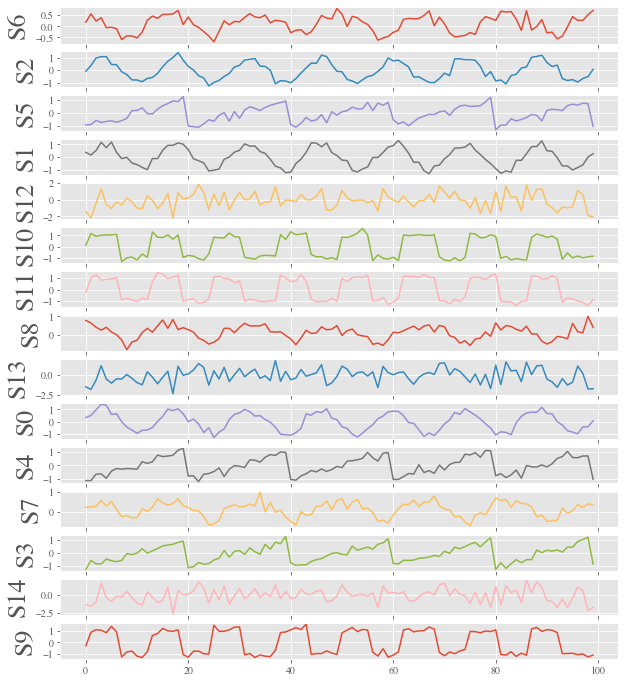

In [7]:
Y,fig, ax = dtw_cluster2.reshuffle_signals(plot_signals=True)
plt.show()

The compiled dtaidistance C-OMP library is not available.
Use Python's multiprocessing library for parellelization (use_mp=True).
See the documentation for alternative installation options.
The compiled dtaidistance C-OMP library is not available.
Using the Python multiprocessing library instead (use_mp=True).
See the documentation for alternative installation options.

 93%|█████████▎| 14/15 [00:00<00:00, 14041.19it/s]


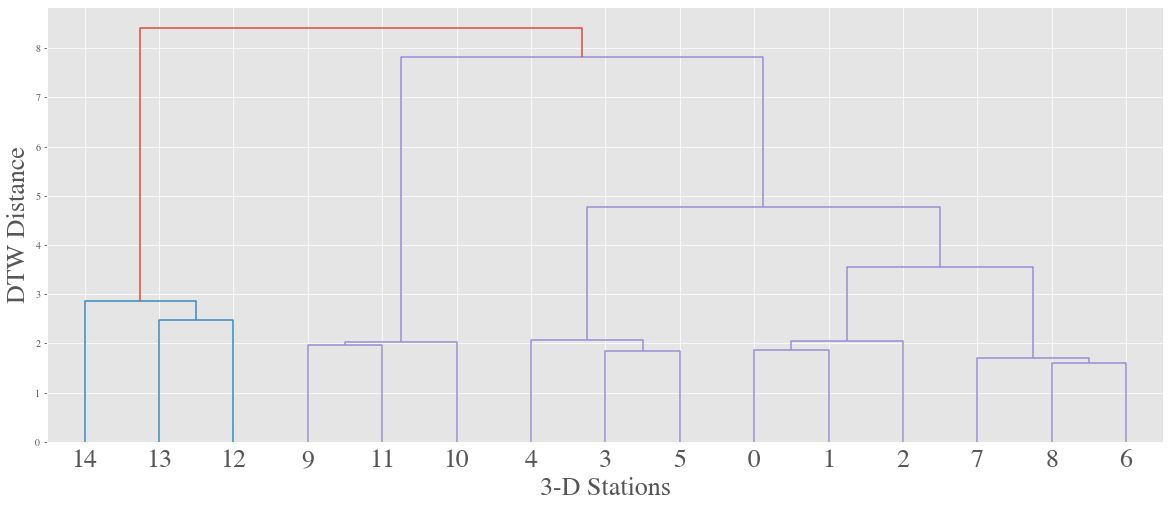

In [8]:
## instantiate the class
dtw_cluster2.plot_cluster()
plt.show()